In [43]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

## Logistic Regression

In [44]:
games = pd.read_csv('datasets/games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,False,False,False,True,False
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,False,False,True,False,False
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,False,False,True,False,False
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,False,False,True,False,False
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,False,False,True,False,False


In [45]:
table = pd.DataFrame(index = ['recall', 'precision', 'accuracy', 'fscore'], 
                     columns = ['original', 'oversampled', 'balanced_sampled'])


In [46]:
# Extract Response and Predictors
X = games.drop(['recommend'], axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.6551512171133513

TPR Train :	 0.11369150779896015
TNR Train :	 0.9527529053152981

FPR Train :	 0.04724709468470185
FNR Train :	 0.8863084922010399

Precision:	 0.5694444444444444
Recall:   	 0.11369150779896015
F1-score :	 0.18954059520369834


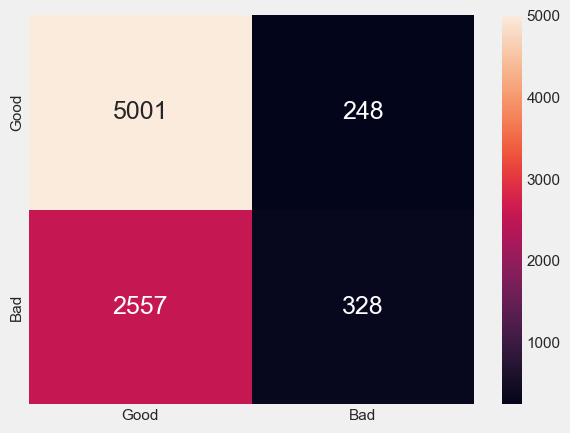

In [47]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_train, y_train_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])


Test Data
Accuracy  :	 0.6749856569133678

TPR Test :	 0.12320675105485232
TNR Test :	 0.959148196436332

FPR Test :	 0.04085180356366797
FNR Test :	 0.8767932489451477

Precision:	 0.6083333333333333
Recall:   	 0.12320675105485232
F1-score :	 0.20491228070175438


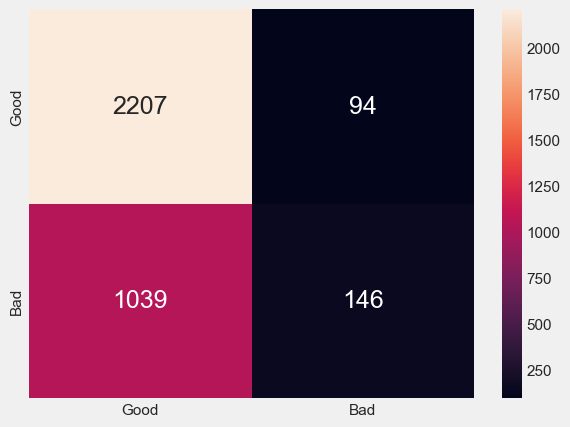

In [48]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['original'] = [recall[0], precision[0], LogisticR.score(X_test, y_test), fscore[0]]

# Logistic Regression - Oversampling

In [49]:
games = pd.read_csv('datasets/games-prediction-over-resampling.csv', index_col= 0)
games.head()


,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0,True
3,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
4,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0,True


In [50]:
games.isnull().sum()

original_price                 0
discount_price                 0
discount_percentage            0
mature_content                 0
genre_Action                   0
genre_Adventure                0
genre_Casual                   0
genre_Massively Multiplayer    0
genre_RPG                      0
genre_Racing                   0
genre_Simulation               0
genre_Sports                   0
genre_Strategy                 0
K_cluster_0                    0
K_cluster_1                    0
K_cluster_2                    0
K_cluster_3                    0
K_cluster_4                    0
recommend                      0
dtype: int64

In [51]:
# Extract Response and Predictors
X = games.drop('recommend', axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.5908756438557763

TPR Train :	 0.2873265929931813
TNR Train :	 0.8363117870722433

FPR Train :	 0.16368821292775665
FNR Train :	 0.7126734070068187

Precision:	 0.5866538646183389
Recall:   	 0.2873265929931813
F1-score :	 0.38573232323232326


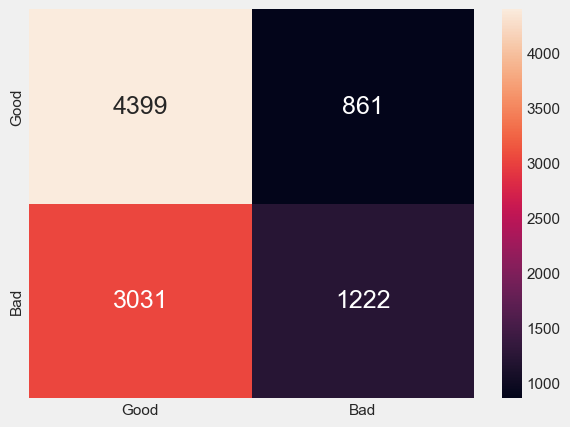

In [52]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_train, y_train_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])


Test Data
Accuracy  :	 0.5918567574196714

TPR Test :	 0.29043088975937326
TNR Test :	 0.8270742358078602

FPR Test :	 0.17292576419213973
FNR Test :	 0.7095691102406267

Precision:	 0.5672131147540984
Recall:   	 0.29043088975937326
F1-score :	 0.384159881569208


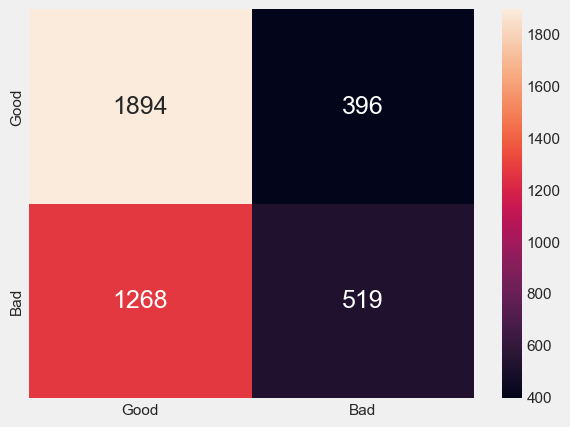

In [53]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['oversampled'] = [recall[0], precision[0], LogisticR.score(X_test, y_test), fscore[0]]

# Logistic Regression - Balanced Resampled

In [54]:
games = pd.read_csv('datasets/games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,1,0,0
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [55]:
# Extract Response and Predictors
X = games.drop(['recommend'], axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.5821192052980132

TPR Train :	 0.5774034822104467
TNR Train :	 0.58683314415437

FPR Train :	 0.41316685584562995
FNR Train :	 0.42259651778955337

Precision:	 0.5828080229226361
Recall:   	 0.5774034822104467
F1-score :	 0.580093164749501


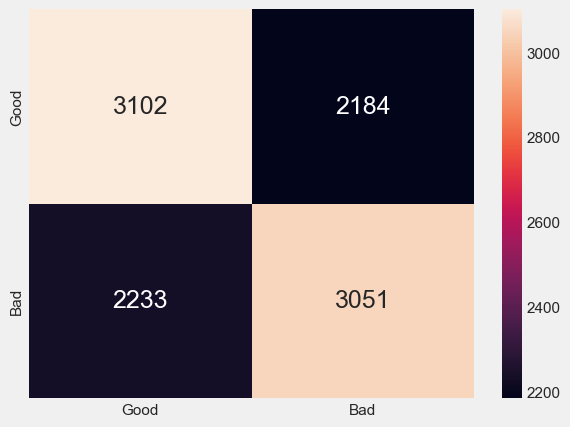

In [56]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_train, y_train_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.5891832229580574

TPR Test :	 0.5803177405119153
TNR Test :	 0.5980565371024735

FPR Test :	 0.4019434628975265
FNR Test :	 0.41968225948808474

Precision:	 0.5910112359550562
Recall:   	 0.5803177405119153
F1-score :	 0.5856156757960365


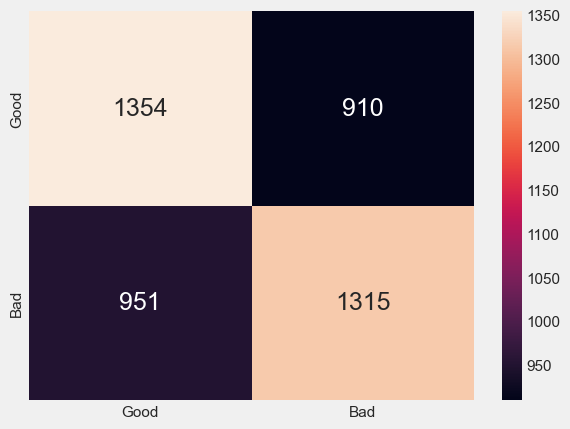

In [57]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])



table['balanced_sampled'] = [recall[0], precision[0], LogisticR.score(X_test, y_test), fscore[0]]



### Overview Visualization of Results 

In [58]:
table

,original,oversampled,balanced_sampled
recall,0.123207,0.290431,0.580318
precision,0.608333,0.567213,0.591011
accuracy,0.674986,0.591857,0.589183
fscore,0.204912,0.384160,0.585616


In [59]:
def draw_figure(table, row, title):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.ylim([0,0.8])
    splot = sb.barplot(x = ['original','oversampled','balanced_sampled'],y = table.iloc[row,:])
    for p in splot.patches:
        if p.get_height() == 0:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        else:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, -12), 
                           textcoords = 'offset points')
    

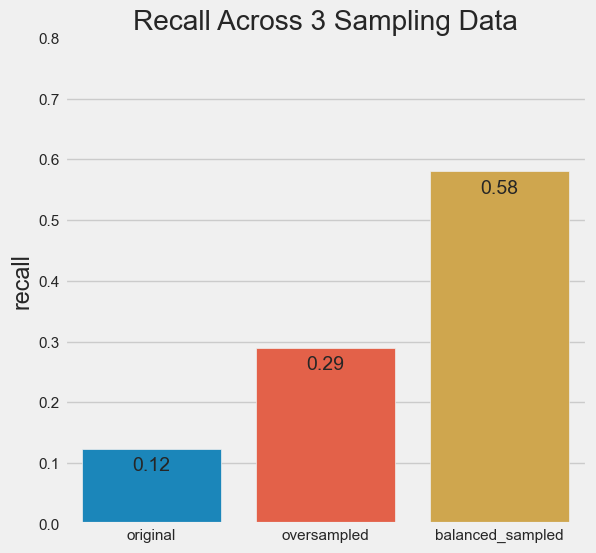

In [60]:
draw_figure(table,0,"Recall Across 3 Sampling Data")

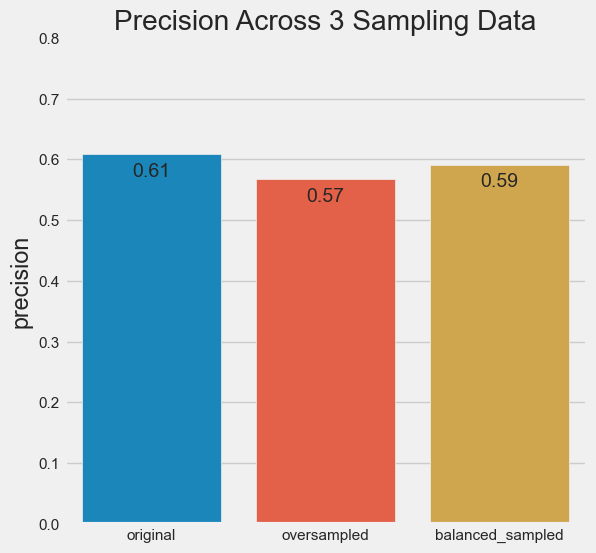

In [61]:
draw_figure(table,1,"Precision Across 3 Sampling Data")

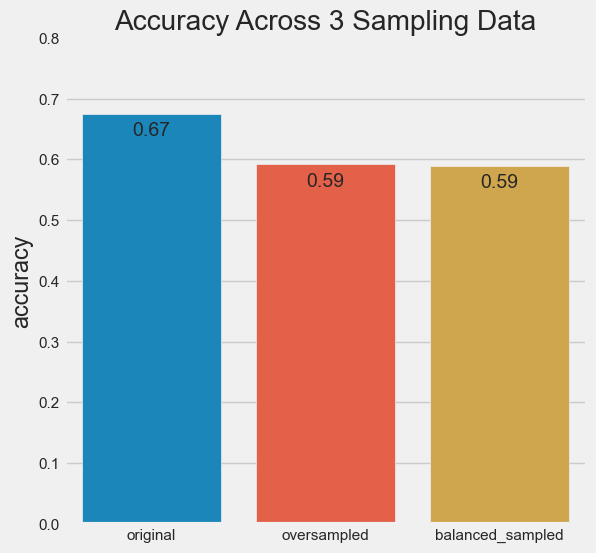

In [62]:
draw_figure(table,2,"Accuracy Across 3 Sampling Data")

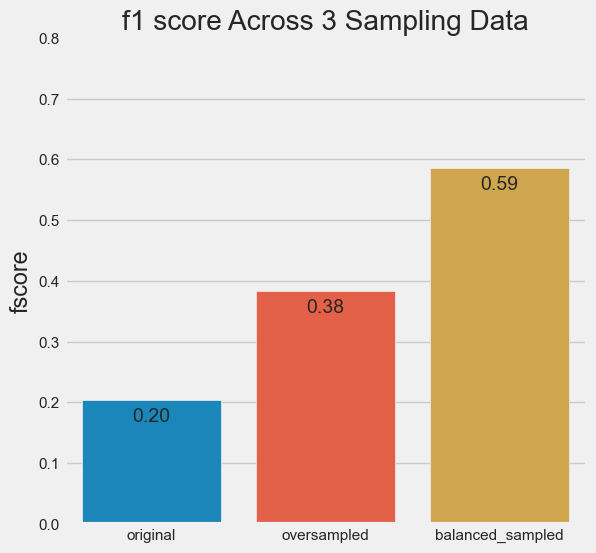

In [67]:
draw_figure(table,3,"f1 score Across 3 Sampling Data")